In [2]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import pickle

In [3]:
k = "final.csv"
df = pd.read_csv(k)
df.dropna(inplace=True)
tweet = [i for i in df['Tweets']]
d1 = {'Happiness': 1, 'Neutral': 0, 'Anger': -2, 'Fear': -3, 'Disgust': -4,
      'Sadness': -1}
df['Sentiment'] = df['Sentiment'].map(d1)

In [4]:
cv = CountVectorizer()
X = cv.fit_transform(tweet).toarray()
y = df.loc[:, 'Sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.2,
                                                    random_state=123)

scoring_r = []
scoring_t = []

cv.fit_transform(tweet).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
def print_score(clf, X_train, Y_train, X_test, Y_test, train=True):
    if train:
        print("\nTraining Result:")
        print(
            "\naccuracy_score: \t {0:.6f}".format(
                accuracy_score(Y_train, clf.predict(X_train))))
        print(
            "\nClassification_report: \n{}\n".format(
                classification_report(Y_train, clf.predict(X_train),
                                      zero_division=0)))
        print(
            "Confusion Matrix: \n {}\n".format(
                confusion_matrix(Y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, Y_train, cv=5, scoring="accuracy")
        print("Average Accuracy:\t {}".format(res))
        print("Average Accuracy:\t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD:\t\t {0:.4f}".format(np.std(res)))
        return "{0:.4f}".format(accuracy_score(Y_train, clf.predict(X_train)))

In [6]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print("\n \t\t------KNN Classifier----\n")

#Scores for training data
v = print_score(knn, X_train, Y_train, X_test, Y_test, train=True)

scoring_r.append(v)


 		------KNN Classifier----


Training Result:

accuracy_score: 	 0.510490

Classification_report: 
              precision    recall  f1-score   support

          -4       0.00      0.00      0.00        10
          -3       1.00      0.06      0.12        16
          -2       0.00      0.00      0.00        11
          -1       0.00      0.00      0.00        11
           0       0.48      1.00      0.65        64
           1       1.00      0.26      0.41        31

    accuracy                           0.51       143
   macro avg       0.41      0.22      0.20       143
weighted avg       0.54      0.51      0.39       143


Confusion Matrix: 
 [[ 0  0  0  0 10  0]
 [ 0  1  0  0 15  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0 64  0]
 [ 0  0  0  0 23  8]]

Average Accuracy:	 [0.55172414 0.44827586 0.48275862 0.53571429 0.53571429]
Average Accuracy:	 0.5108
Accuracy SD:		 0.0390


In [7]:
clf = svm.SVC()
clf.fit(X_train, Y_train)

print("\n\n\t\t----- SVM Details-------\n\n")

#Scores for training data
v = print_score(clf, X_train, Y_train, X_test, Y_test, train=True)
scoring_r.append(v)



		----- SVM Details-------



Training Result:

accuracy_score: 	 0.811189

Classification_report: 
              precision    recall  f1-score   support

          -4       1.00      0.70      0.82        10
          -3       1.00      0.56      0.72        16
          -2       1.00      0.64      0.78        11
          -1       1.00      0.36      0.53        11
           0       0.70      1.00      0.83        64
           1       1.00      0.81      0.89        31

    accuracy                           0.81       143
   macro avg       0.95      0.68      0.76       143
weighted avg       0.87      0.81      0.80       143


Confusion Matrix: 
 [[ 7  0  0  0  3  0]
 [ 0  9  0  0  7  0]
 [ 0  0  7  0  4  0]
 [ 0  0  0  4  7  0]
 [ 0  0  0  0 64  0]
 [ 0  0  0  0  6 25]]

Average Accuracy:	 [0.55172414 0.44827586 0.48275862 0.5        0.53571429]
Average Accuracy:	 0.5037
Accuracy SD:		 0.0370


In [8]:
model = GaussianNB()
model.fit(X_train, Y_train)
print("\n\n Naive Bayesian\n\n")

#Scores for training data
v = print_score(model, X_train, Y_train, X_test, Y_test, train=True)
scoring_t.append(v)



 Naive Bayesian



Training Result:

accuracy_score: 	 0.986014

Classification_report: 
              precision    recall  f1-score   support

          -4       1.00      1.00      1.00        10
          -3       1.00      1.00      1.00        16
          -2       0.92      1.00      0.96        11
          -1       1.00      1.00      1.00        11
           0       1.00      0.97      0.98        64
           1       0.97      1.00      0.98        31

    accuracy                           0.99       143
   macro avg       0.98      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143


Confusion Matrix: 
 [[10  0  0  0  0  0]
 [ 0 16  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  1  0 62  1]
 [ 0  0  0  0  0 31]]

Average Accuracy:	 [0.34482759 0.34482759 0.34482759 0.25       0.39285714]
Average Accuracy:	 0.3355
Accuracy SD:		 0.0466


In [9]:
def graph(c):

    har = [0, 0, 0, 0, 0, 0]
    for i in c:
        if i == 'Happiness':
            har[0] += 1
        elif i == 'Anger':
            har[1] += 1
        elif i == 'Neutral':
            har[5] += 1
        elif i == 'Fear':
            har[2] += 1
        elif i == 'Sadness':
            har[3] += 1
        elif i == 'Disgust':
            har[4] += 1
    s = float(sum(har))
    for i in range(len(har)):
        har[i] = har[i]/s
    return har


sentiment = pd.read_csv("final.csv")
graph_sentiment = graph(sentiment['Sentiment'].values)

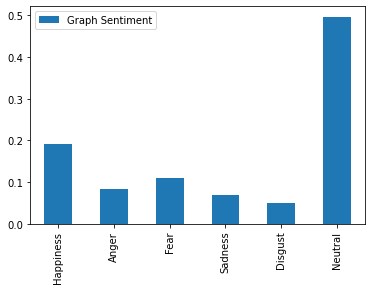

In [10]:
Index = ['Happiness', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Neutral']
graph = {'Graph Sentiment': graph_sentiment}
qw = pd.DataFrame(graph, index=Index)
qw.plot(y=["Graph Sentiment"], kind="bar")
# y.label = 'Number of tweets'
plt.show()

In [11]:
## Saving Model and vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [11]:
# with open('vectorizer.pkl', 'rb') as f:
#     cv = pickle.load(f)
# with open('model.pkl', 'rb') as f:
#     model = pickle.load(f)